In [1]:
import pandas as pd

In [3]:
my_data = pd.read_csv('cscpopendata.csv')
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114635 entries, 0 to 114634
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   CDPHId                  114635 non-null  int64  
 1   ProductName             114635 non-null  object 
 2   CSFId                   80662 non-null   float64
 3   CSF                     80237 non-null   object 
 4   CompanyId               114635 non-null  int64  
 5   CompanyName             114635 non-null  object 
 6   BrandName               114408 non-null  object 
 7   PrimaryCategoryId       114635 non-null  int64  
 8   PrimaryCategory         114635 non-null  object 
 9   SubCategoryId           114635 non-null  int64  
 10  SubCategory             114635 non-null  object 
 11  CasId                   114635 non-null  int64  
 12  CasNumber               108159 non-null  object 
 13  ChemicalId              114635 non-null  int64  
 14  ChemicalName        

# Exploratory Data Analysis (EDA)

## Data Cleaning

### handling duplicates

In [5]:
my_data.duplicated().sum()

254

In [7]:
#duplecates will be removed for this analysis
clean_data = my_data.drop_duplicates().copy()

### handling nulls

In [130]:
# from the info list of my_data we conclude that most columns used in this data analysis has no nulls
#for DiscontinuedDate column there are nulls but it was assumed that the products are still avalible

In [9]:
#investigatin BrandName column  nulls were found 
nulls = clean_data['BrandName'].isna()
clean_data[nulls]['CompanyName'].value_counts()

CompanyName
Merle Norman Cosmetics                                     110
Greenbrier International, Inc.                              71
Sysco Guest Supply LLC.                                     37
Guangzhou Baiyun Darong Fine Chemical Industry Co.,Ltd.      4
Fisk Industries Inc                                          2
Atlas Development Limited                                    1
Ningbo Rejoice I/E Co., Ltd.                                 1
Jiangxi Iris Chemical Co.,Ltd                                1
Name: count, dtype: int64

In [11]:
#checking the % of nulls compared to whole data its very small so no further cleaning will be preformed
row,col = clean_data.shape
(clean_data.isna().sum()/row)*100

CDPHId                     0.000000
ProductName                0.000000
CSFId                     29.490038
CSF                       29.861603
CompanyId                  0.000000
CompanyName                0.000000
BrandName                  0.198460
PrimaryCategoryId          0.000000
PrimaryCategory            0.000000
SubCategoryId              0.000000
SubCategory                0.000000
CasId                      0.000000
CasNumber                  5.660905
ChemicalId                 0.000000
ChemicalName               0.000000
InitialDateReported        0.000000
MostRecentDateReported     0.000000
DiscontinuedDate          88.745508
ChemicalCreatedAt          0.000000
ChemicalUpdatedAt          0.000000
ChemicalDateRemoved       97.390301
ChemicalCount              0.000000
dtype: float64

### Replacing values

In [13]:
#checking brand names for Merle Norman Cosmetics company we find that it has only one brand name but with diffrent formats
clean_data[clean_data['CompanyName'] == 'Merle Norman Cosmetics']['BrandName'].unique()

array(['Merle Norman Cosmetics', nan, 'Merle Norman',
       'Merle Norman Cosmetics ', 'Merle Norman ', 'MERLE NORMAN ',
       'MERLE NORMAN', 'MERLE NORMAN COSMETICS, INC. '], dtype=object)

In [15]:
#for better analysis we are changeng all Merle Norman Cosmetics company brands to 'Merle Norman Cosmetics'
clean_data['BrandName'] = clean_data['BrandName'].replace(['Merle Norman', 'Merle Norman ','MERLE NORMAN ','MERLE NORMAN','MERLE NORMAN COSMETICS, INC. '],'Merle Norman Cosmetics')

In [17]:
clean_data[clean_data['CompanyName'] == 'Merle Norman Cosmetics']['BrandName'].unique()

array(['Merle Norman Cosmetics', nan, 'Merle Norman Cosmetics '],
      dtype=object)

### Check how many types of chemicals we have

In [19]:
clean_data['ChemicalName'].nunique()

123

### Check how many types of PrimaryCategory we have

In [21]:
chemical_tyeps_count = clean_data['PrimaryCategory'].value_counts()
chemical_tyeps_count

PrimaryCategory
Makeup Products (non-permanent)      75822
Nail Products                        15347
Skin Care Products                    7680
Sun-Related Products                  4939
Bath Products                         3463
Hair Coloring Products                1882
Hair Care Products (non-coloring)     1566
Tattoos and Permanent Makeup          1477
Personal Care Products                 765
Fragrances                             644
Oral Hygiene Products                  525
Shaving Products                       222
Baby Products                           49
Name: count, dtype: int64

## Questions to answer for data analysis

### Q1)What chemicals are commenly found in discontinued products?

In [23]:
discontinued_df = clean_data[clean_data['DiscontinuedDate'].notnull()]
discontinued_df = discontinued_df['ChemicalName'].value_counts().sort_values(ascending=True)
discontinued_df = pd.DataFrame(discontinued_df)
discontinued_df = discontinued_df.reset_index()
discontinued_df.tail(10)

,ChemicalName,count
58,Retinyl palmitate,44
59,Cosmetic talc,71
60,Carbon black,84
61,"Silica, crystalline (airborne particles of res...",94
62,"Mineral oils, untreated and mildly treated",160
63,Butylated hydroxyanisole,188
64,Cocamide diethanolamine,360
65,Mica,397
66,"Retinol/retinyl esters, when in daily dosages ...",721
67,Titanium dioxide,10291


In [25]:
discontinued_df['short_name'] = discontinued_df['ChemicalName'].apply(lambda x: str(x).split(',')[0])
# discontinued_df['short_name'] = discontinued_df['short_name'][0]
discontinued_df

,ChemicalName,count,short_name
0,Ethanol in alcoholic beverages,1,Ethanol in alcoholic beverages
1,Lead acetate,1,Lead acetate
2,Chromium (hexavalent compounds),1,Chromium (hexavalent compounds)
3,"Titanium dioxide (airborne, unbound particles ...",1,Titanium dioxide (airborne
4,Ginkgo biloba extract,1,Ginkgo biloba extract
...,...,...,...
63,Butylated hydroxyanisole,188,Butylated hydroxyanisole
64,Cocamide diethanolamine,360,Cocamide diethanolamine
65,Mica,397,Mica
66,"Retinol/retinyl esters, when in daily dosages ...",721,Retinol/retinyl esters


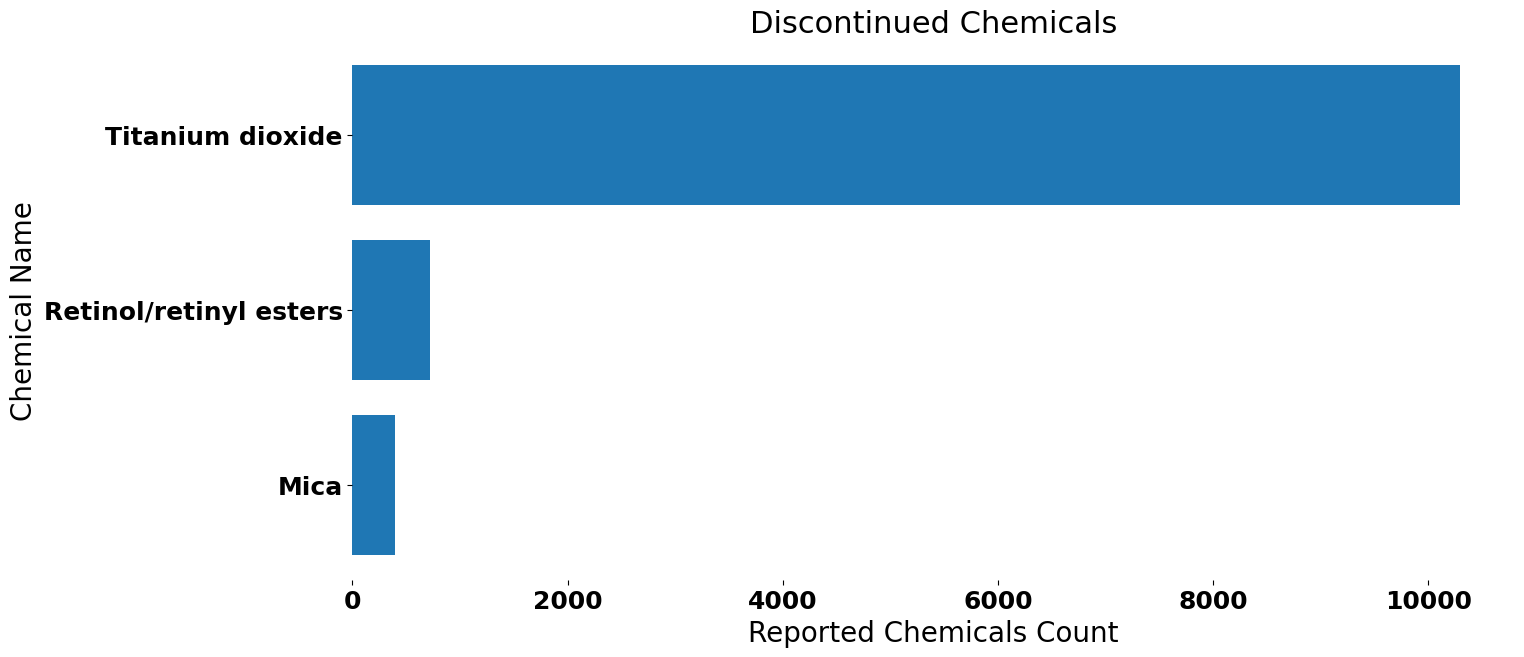

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))
plt.barh(discontinued_df.tail(3).short_name, discontinued_df.tail(3)['count'])
plt.title("Discontinued Chemicals", fontsize=22)
plt.ylabel("Chemical Name", fontsize=20)
plt.xlabel("Reported Chemicals Count", fontsize=20)
plt.xticks(fontsize=18, fontweight='bold')
plt.yticks(fontsize=18, fontweight='bold')
plt.box(on=False)
# plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.3)
# plt.show()
plt.savefig('Discontinued_Chemicals.png', bbox_inches='tight', pad_inches=1)

In [156]:
# while titanium dioxide is by far the most frequently reported ingredient products with titanium dioxide are most discontinued 

### Q2)Which prime category contains most of the products that have been discontinued?

In [29]:
discounted_prime = clean_data.groupby(['PrimaryCategory'])['DiscontinuedDate'].count().sort_values(ascending=True)

In [31]:
discounted_prime_df = pd.DataFrame(discounted_prime)
discounted_prime_df = discounted_prime_df.reset_index()
discounted_prime_df.tail(5)

,PrimaryCategory,DiscontinuedDate
8,Bath Products,556
9,Nail Products,764
10,Sun-Related Products,853
11,Skin Care Products,1146
12,Makeup Products (non-permanent),8367


In [33]:
import matplotlib.pyplot as plt

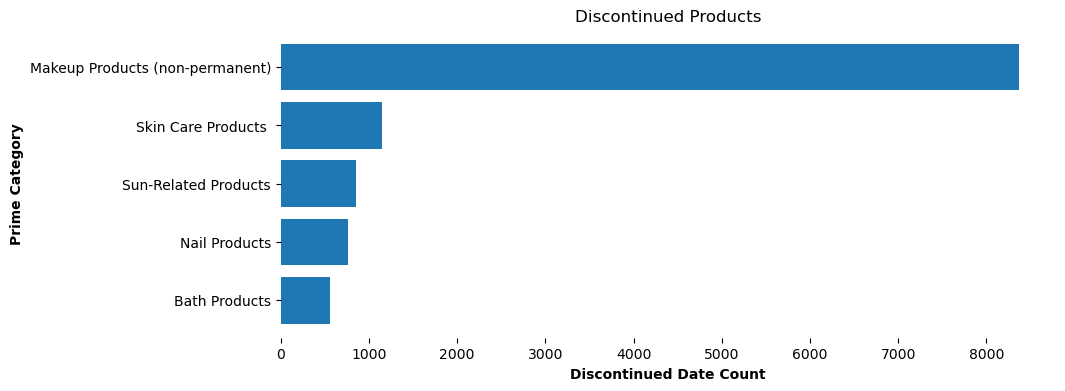

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.barh(discounted_prime_df.tail(5).PrimaryCategory, discounted_prime_df.tail(5).DiscontinuedDate)
plt.title("Discontinued Products")
plt.ylabel("Prime Category",fontweight='bold')
plt.xlabel("Discontinued Date Count",fontweight='bold')
plt.box(on=False)
# plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.3)
plt.savefig('Discontinued_Products.png', bbox_inches='tight', pad_inches=1)
plt.show()

In [37]:
# since most of products are used directly on sensitve body parts like eyes companies most likly to discontinued such products 

### Q3)Which chemicals are more present per product prime category?

In [40]:
def condition(name, df):
    '''
    this function takes the top 5 chemicals and return all other chemical names as other to make it easier to plot 
    '''
    top_5 = df.ChemicalName.head(5).to_list()
    if name in top_5:
        return name
    else:
        return 'others'
    

def others(df):
    '''
    this function takes a data frame and check all chemical names in it using condition() function and return a new column with the new names

    '''
    new_col = df.ChemicalName.apply(lambda name: condition(name, df))
    return new_col
        

### Q3a) Makeup

In [43]:
makeup_data_df = clean_data[clean_data['PrimaryCategory'] == 'Makeup Products (non-permanent)']
makeup_data_df = makeup_data_df.value_counts('ChemicalName')
makeup_data_df = pd.DataFrame(makeup_data_df)
makeup_data_df = makeup_data_df.reset_index()
makeup_data_df['new_chemical_name'] = others(makeup_data_df)
makeup_data_df['percentage'] = makeup_data_df['count'].apply(lambda x:(x/makeup_data_df['count'].sum())*100)                                            
makeup_top_5 = pd.DataFrame(makeup_data_df.groupby('new_chemical_name')["percentage"].sum().sort_values())
makeup_top_5.reset_index(inplace=True)

In [45]:
makeup_top_5['short_name'] = makeup_top_5['new_chemical_name'].apply(lambda x: str(x).split(',')[0])
makeup_top_5

,new_chemical_name,percentage,short_name
0,Talc,1.918968,Talc
1,Butylated hydroxyanisole,2.031073,Butylated hydroxyanisole
2,Mica,2.310675,Mica
3,"Silica, crystalline (airborne particles of res...",2.372662,Silica
4,others,5.713381,others
5,Titanium dioxide,85.653240,Titanium dioxide


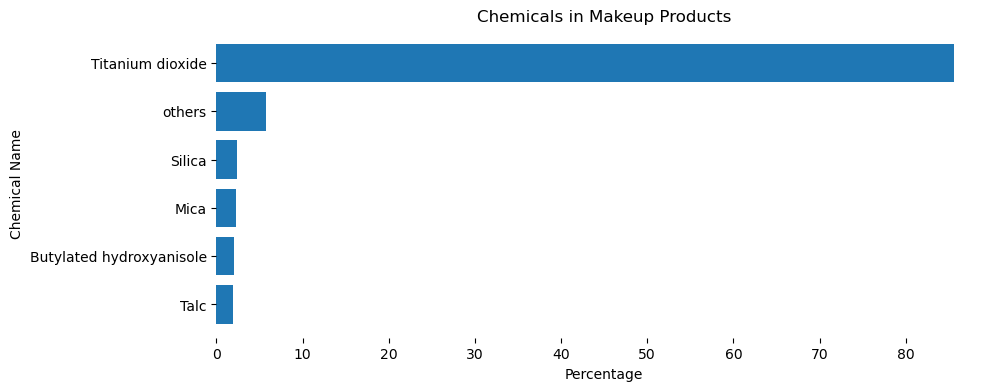

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.barh(makeup_top_5.tail(6).short_name, makeup_top_5.tail(6)['percentage'])
plt.title("Chemicals in Makeup Products")
plt.ylabel("Chemical Name")
plt.xlabel("Percentage")
plt.box(on=False)
# plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.3)
plt.savefig('Chemicals_in_Makeup_Products.png', bbox_inches='tight', pad_inches=1)
plt.show()

### Q3b) Nail Products

In [50]:
nail_data_df = clean_data[clean_data['PrimaryCategory'] == 'Nail Products']
nail_data_df = nail_data_df.value_counts('ChemicalName')
nail_data_df = pd.DataFrame(nail_data_df)
nail_data_df = nail_data_df.reset_index()
nail_data_df['new_chemical_name'] = others(nail_data_df)
nail_data_df['percentage'] = nail_data_df['count'].apply(lambda x:(x/nail_data_df['count'].sum())*100)                                            
nail_top_5 = pd.DataFrame(nail_data_df.groupby('new_chemical_name')["percentage"].sum().sort_values())
nail_top_5.reset_index(inplace=True)

In [52]:
nail_top_5['short_name'] = nail_top_5['new_chemical_name'].apply(lambda x: str(x).split(',')[0])
nail_top_5

,new_chemical_name,percentage,short_name
0,"Carbon black (airborne, unbound particles of r...",1.120740,Carbon black (airborne
1,"Retinol/retinyl esters, when in daily dosages ...",1.309702,Retinol/retinyl esters
2,others,3.499055,others
3,Carbon black,4.789210,Carbon black
4,"Silica, crystalline (airborne particles of res...",5.323516,Silica
5,Titanium dioxide,83.957777,Titanium dioxide


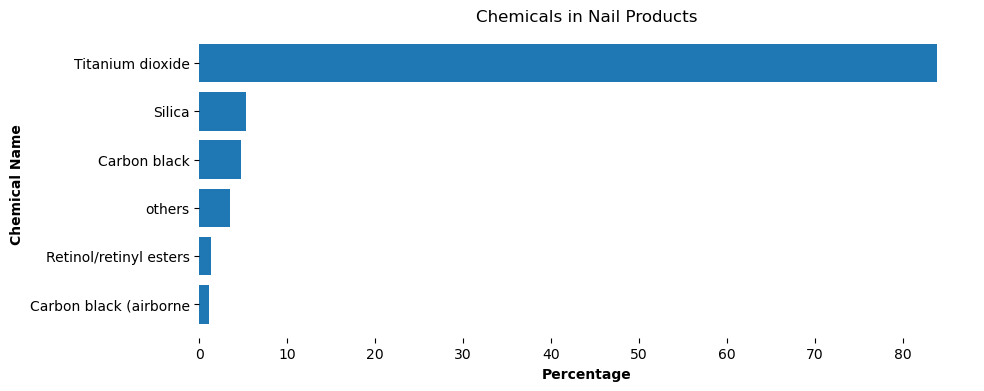

In [54]:
plt.figure(figsize=(10, 4))
plt.barh(nail_top_5.tail(6).short_name,nail_top_5.tail(6)['percentage'])
plt.title("Chemicals in Nail Products")
plt.ylabel("Chemical Name",fontweight='bold')
plt.xlabel("Percentage",fontweight='bold')
plt.box(on=False)
#plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.3)
#plt.show()
plt.savefig('Chemicals_in_Nail_Products.png', bbox_inches='tight', pad_inches=1)

### Q3c) Skin Care Products

In [57]:
clean_data['PrimaryCategory'].unique()

array(['Makeup Products (non-permanent)',
       'Hair Care Products (non-coloring)', 'Nail Products',
       'Personal Care Products', 'Sun-Related Products', 'Bath Products',
       'Skin Care Products ', 'Fragrances',
       'Tattoos and Permanent Makeup', 'Hair Coloring Products',
       'Oral Hygiene Products', 'Shaving Products', 'Baby Products'],
      dtype=object)

In [59]:
skin_data_df = clean_data[clean_data['PrimaryCategory'] == 'Skin Care Products ']
skin_data_df = skin_data_df.value_counts('ChemicalName')
skin_data_df = pd.DataFrame(skin_data_df)
skin_data_df = skin_data_df.reset_index()
skin_data_df['new_chemical_name'] = others(skin_data_df)
skin_data_df['percentage'] = skin_data_df['count'].apply(lambda x:(x/skin_data_df['count'].sum())*100)                                            
skin_top_5 = pd.DataFrame(skin_data_df.groupby('new_chemical_name')["percentage"].sum().sort_values())
skin_top_5.reset_index(inplace=True)

In [61]:
skin_top_5['short_name'] = skin_top_5['new_chemical_name'].apply(lambda x: str(x).split(',')[0])
skin_top_5

,new_chemical_name,percentage,short_name
0,Triethanolamine,2.955729,Triethanolamine
1,Cocamide diethanolamine,2.981771,Cocamide diethanolamine
2,Vitamin A palmitate,6.028646,Vitamin A palmitate
3,"Retinol/retinyl esters, when in daily dosages ...",6.640625,Retinol/retinyl esters
4,others,19.635417,others
5,Titanium dioxide,61.757812,Titanium dioxide


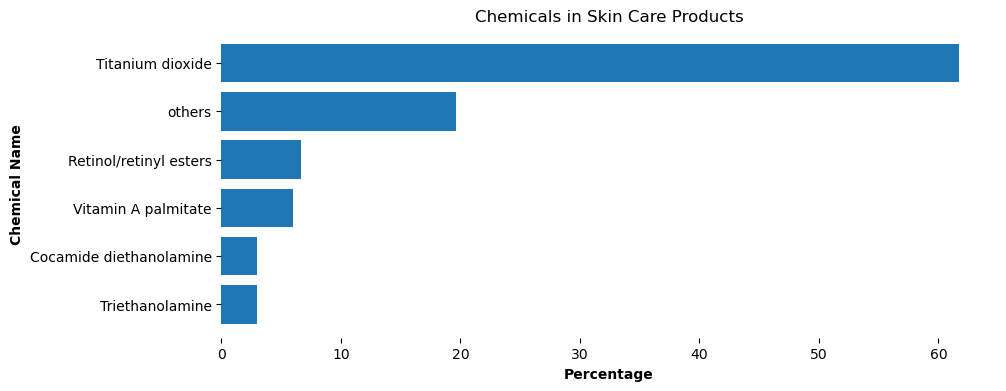

In [63]:
plt.figure(figsize=(10, 4))
plt.barh(skin_top_5.tail(6).short_name,skin_top_5.tail(6)['percentage'])
plt.title("Chemicals in Skin Care Products")
plt.ylabel("Chemical Name",fontweight='bold')
plt.xlabel("Percentage",fontweight='bold')
plt.box(on=False)
#plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.3)
#plt.show()
plt.savefig('Chemicals_in_Skin_Care_Products.png', bbox_inches='tight', pad_inches=1)

### Q4)Which companies have discontinued products and which ones haven’t at all? 

In [66]:
#company with discontinued products
company_discontinued_df = clean_data.groupby(clean_data['CompanyName'].str.strip().str.upper())['DiscontinuedDate'].count().sort_values(ascending=False)

In [68]:
company_discontinued_df = pd.DataFrame(company_discontinued_df).reset_index()
company_discontinued_df.head(5)
# company_discontinued_df.tail(5)

,CompanyName,DiscontinuedDate
0,THE PROCTER & GAMBLE COMPANY,2856
1,VICTORIA'S SECRET BEAUTY,1176
2,"ELIZABETH ARDEN, INC.",743
3,MAESA LLC,643
4,BATH & BODY WORKS,563


In [70]:
company_discontinued_df.columns

Index(['CompanyName', 'DiscontinuedDate'], dtype='object')

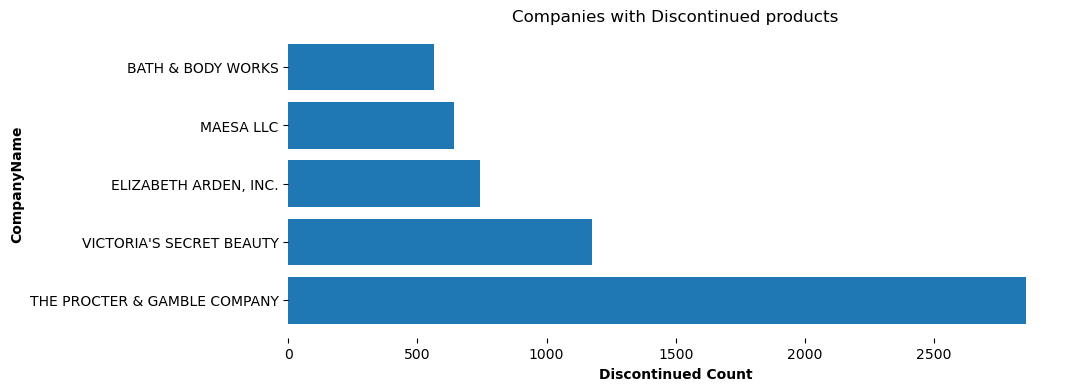

In [72]:
plt.figure(figsize=(10, 4))
plt.barh(company_discontinued_df.head(5)['CompanyName'],company_discontinued_df.head(5).DiscontinuedDate)
plt.title("Companies with Discontinued products")
plt.ylabel("CompanyName",fontweight='bold')
plt.xlabel("Discontinued Count",fontweight='bold')
plt.box(on=False)
#plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.3)
#plt.show()
plt.savefig('Companies_with_Discontinued.png', bbox_inches='tight', pad_inches=1)

In [74]:
#company with no discontinued products
company_discontinued_df[company_discontinued_df['DiscontinuedDate'] == 0]['CompanyName'].count()

415

In [76]:
#examples on company with no discontinued products
condition = company_discontinued_df['DiscontinuedDate'] == 0
company_discontinued_df[condition]['CompanyName'].unique()

array(['PRIMORANCE', 'NEW FRAGRANCE CONTINENTAL INC.',
       'NAIL ALLIANCE, LLC', 'NEW SPIRIT NATURALS, INC.',
       'NINGBO MEITELI COSMETICS CO.,LTD.', 'PHILOSOPHY',
       'NAIL MAGIC LLC', "NATURE'S SUNSHINE PRODUCTS, INC.",
       'NAMASTE LABORATORIES', 'PINNACLE COSMETICS',
       'NEOSTRATA COMPANY, INC., A JOHNSON & JOHNSON COMPANY',
       'PLCOSMETIC', 'NATURA BISSE INTERNATIONAL', 'NATURAL SOLTER S.L.',
       'PPP&C INC.', 'PRAI BEAUTY GROUP INC', 'NATURAL WEALTH',
       'NEOSTRATA COMPANY, INC.', 'PRIMA-DERM, S.L.',
       'PRESCRIPTIVES INC.', 'PARFUMS DE COEUR, LTD.',
       'NINGBO REJOICE I/E CO., LTD.',
       'NINGHAI JIXIANG STATIONERY FACTORY', 'PARFUMS LORIS AZZARO',
       'PARFUMS NINA RICCI', 'PACO RABANNE PARFUMS', 'PACHA SOAP CO.',
       'OSEA MALIBU', 'ORLY INTERNATIONAL', 'ORLANE, INC',
       'ORIGINS NATURAL RESOURCES INC.', 'ORIBE HAIR CARE LLC',
       'OJON CORPORATIONA', 'PEARLOSOPHY USA, LLC', 'OCEANA USA, INC.',
       'OBAGI MEDICAL PRODUCTS,

### Q5)What are top 10 brands with most chemicals in there products?

In [79]:

#similer brand names are both in upper and lower case and some have space within the name thats why we used strip() and upper() for acurate results
brands_upper = clean_data['BrandName'].str.strip().str.upper()
all_upper_brands = brands_upper.value_counts().sort_values(ascending=True).tail(10)

In [81]:
brands_df = pd.DataFrame(all_upper_brands).reset_index()
brands_df

,BrandName,count
0,NO7,1751
1,SALLY HANSEN,1869
2,VICTORIA'S SECRET BEAUTY,2106
3,NARS,2185
4,TARTE,2277
5,CHARLOTTE TILBURY,2469
6,REVLON,2711
7,BAREMINERALS,3164
8,NYX,3227
9,SEPHORA,5165


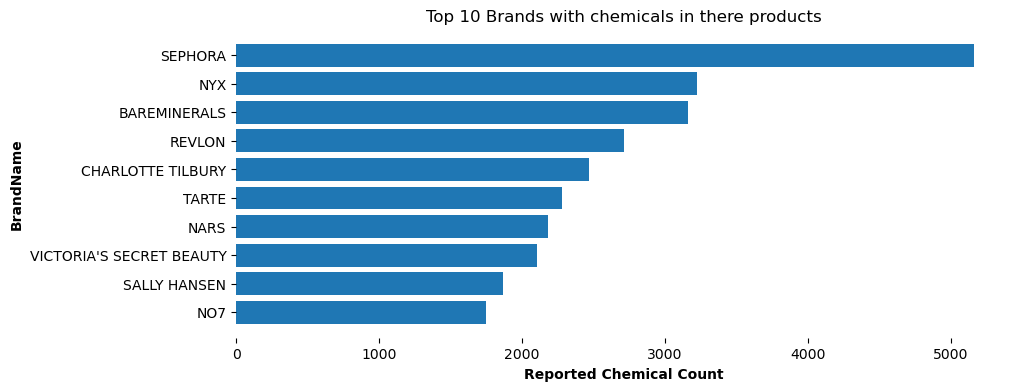

In [83]:
plt.figure(figsize=(10, 4))
plt.barh(brands_df.tail(10).BrandName,brands_df.tail(10)['count'])
plt.title("Top 10 Brands with chemicals in there products")
plt.ylabel("BrandName",fontweight='bold')
plt.xlabel("Reported Chemical Count",fontweight='bold')
plt.box(on=False)
#plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.3)
#plt.show()
plt.savefig('Top_10_Brands', bbox_inches='tight', pad_inches=1)

In [85]:
# some brands that have reported chemicals in their products so be careful befor purchasing.

### Q6)Did the chemicals report decreased over the years?

In [88]:
clean_data['InitialDateReported']= pd.to_datetime(clean_data['InitialDateReported'])
report_count = clean_data['InitialDateReported'].dt.year.value_counts()#.sort_values(ascending=False)
report_count = pd.DataFrame(report_count).reset_index()
report_count 

,InitialDateReported,count
0,2009,30444
1,2010,14773
2,2019,13876
3,2018,9615
4,2014,8483
5,2015,7788
6,2017,7683
7,2013,6367
8,2011,4533
9,2016,4494


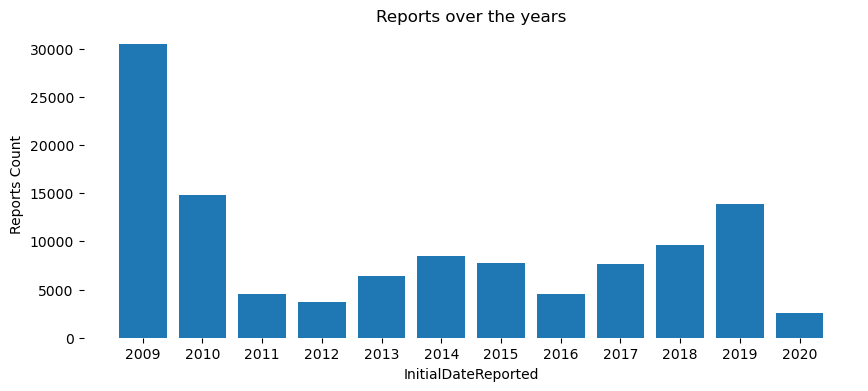

In [90]:
plt.figure(figsize=(10, 4)) 
plt.bar(report_count.InitialDateReported,report_count['count'])
plt.title("Reports over the years")
plt.xlabel("InitialDateReported")
plt.xticks([2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020],
           ['2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020'])
plt.ylabel("Reports Count")
plt.box(on=False)
#plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.3)
plt.show()

### convert the clean data to a CSV file

In [94]:
clean_data.to_csv("Chemical_in_cosmatics_Clean_data.csv")